In [1]:
#Data pre-processed version
#Dependencies
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from voicedata import voicedata

# Data Manupulation
import numpy as np
import pandas as pd
import math

# Plotting graphs
import matplotlib.pyplot as plt

# Required Sklearn libraries Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

#testing model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, r2_score

# Data fetching
#from pandas_datareader import data as pdr

#using python 3.6

Using TensorFlow backend.


KNN stores the entire training dataset which it uses as its representation. Where can use KNN? The data should be smaller and noise-free.
KNN does not learn any model. It is a lazy learner because it does not learn a discriminitive function in the dataset.
KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.
There are many distance measures to choose from to match the structure of your input data.
That it is a good idea to rescale your data, such as using normalization, when using KNN.

In [2]:
#Getting data
#df = pd.read_csv("Resources\\voice.csv")
(X_train, X_test,
genc, g_train, g_train_enc, g_train_cat, g_test, g_test_enc, g_test_cat,
nenc, n_train, n_train_enc, n_train_cat, n_test, n_test_enc, n_test_cat,
ienc, i_train, i_train_enc, i_train_cat, i_test, i_test_enc, i_test_cat) = voicedata()

#df.head()

(1350, 4)
(450, 4)


In [3]:
#Check the length of the dataset. This is length of y:
#len(df)
print(X_train.shape) 
print(X_test.shape) 
print(g_train_cat.shape) 
print(g_test_cat.shape) 
print(n_train_cat.shape) 
print(n_test_cat.shape) 
print(i_train_cat.shape) 
print(i_test_cat.shape) 

(1350, 40)
(450, 40)
(1350, 2)
(450, 2)
(1350, 9)
(450, 9)
(1350, 40)
(450, 40)


Data preprocessing

In [4]:
# Assign X (data) and y (target)
#X = df.drop("label", axis=1)
#y = df["label"]
#print(X.shape, y.shape)


#Dummy encoding
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=["label"])
#data_binary_encoded.head()
#Dummy Encoding
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=["gender"], drop_first = True)
#data_binary_encoded.head()

In [5]:
#target = df["Outcome"]
#target_names = ["negative", "positive"]

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
#len(X_train)
#data = df.drop("Outcome", axis=1)
#feature_names = data.columns
#data.head()

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

#For slicing data to look at all rows, 0 to 7 columns, test 20%
#x = dataset.iloc[:, 0:8]
##just column 8
#y = dataset.iloc[:, 8]

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [8]:
#plt.hist(df['meanfreq'], bins = 2)
#scalinng data
#sc_x = StandardScalar()
#X_train = sc_X.fit_transorm(X_train)
#X_test = sc_X.transform(X_test)

In [9]:
#plt.hist(df['label'], bins = 2)

How do we choose the factor k? The KNN algorithm is based on feature similarity. Choosing the right k is a process called parameter tuning. It is important to find the better k for the best accuracy. An odd value for k is selected to avoid confusion between two classes of data. Some people use the square root of n where n is the number of data points.

In [4]:
math.sqrt(len(X_train))

36.742346141747674

In [5]:
math.sqrt(len(g_test_cat))

21.213203435596427

In [6]:
math.sqrt(len(n_test_cat))

21.213203435596427

In [7]:
math.sqrt(len(i_test_cat))

21.213203435596427

In [8]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
#classifier.fit(X_train, y_train)
classifier.fit(X_train, g_train_enc)
y_pred_g = classifier.predict(X_test)
y_pred_g

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [9]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
#classifier.fit(X_train, y_train)
classifier.fit(X_train, n_train_enc)
y_pred_n = classifier.predict(X_test)
y_pred_n

array([8, 8, 6, 8, 8, 8, 3, 8, 8, 8, 8, 7, 8, 3, 8, 8, 8, 8, 8, 7, 8, 8,
       8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 7, 8, 8, 5, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 3, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3,
       8, 8, 4, 8, 8, 8, 6, 8, 8, 3, 2, 8, 8, 1, 8, 8, 8, 3, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 3, 8, 8, 8, 6, 3, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 7, 8, 2, 2, 3, 8, 8, 8, 2, 8, 2, 8, 8, 8, 8,
       8, 8, 8, 3, 8, 5, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 7, 8,
       3, 3, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 6, 8, 8, 8, 7, 8, 8, 8, 5, 8, 8, 4, 8, 8, 8, 8, 7, 8, 8, 1,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       5, 8, 8, 8, 8, 8, 8, 7, 8, 8, 3, 8, 8, 8, 8,

In [10]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
#classifier.fit(X_train, y_train)
classifier.fit(X_train, i_train_enc)
y_pred_i = classifier.predict(X_test)
y_pred_i

array([24, 37,  7, 34, 17, 23, 10, 33, 25, 24,  8,  6, 19, 10,  1, 23,  1,
       24, 33, 21,  7, 20, 23,  9, 37, 36, 26,  8, 23, 24, 25, 22, 10,  8,
        1, 32, 21, 18, 28, 36, 10, 25, 39, 19, 14, 36, 39, 32,  7, 37,  9,
       18, 25, 22, 15, 24, 37, 17, 21, 25, 19, 32, 28,  8,  2, 31, 28, 31,
       23, 10, 14, 25, 10,  6,  9,  8,  8, 32, 22,  8, 20, 34,  2, 32, 14,
        4, 33,  9,  0, 30, 25,  1, 15, 17,  2, 39, 32,  3, 35,  9, 33, 33,
       31, 27,  6, 37, 25, 29, 29, 23,  8, 14, 35, 33,  9, 25,  7, 11, 24,
       10, 22, 17, 28, 19,  8, 14,  8, 10, 33, 33, 19, 37, 31, 31, 28,  8,
       33,  2, 32, 34,  7,  2, 32, 23, 12,  2,  2,  7, 23, 24, 11,  9, 11,
       23, 31, 22, 20,  2, 28, 11, 14, 21, 17, 22, 22, 38, 14,  4, 16, 22,
       39, 22, 33,  1, 37,  9,  5, 28,  4, 38, 24, 36, 17,  1, 11, 38,  2,
        0, 27, 38, 13, 16, 14, 25, 33, 33, 21, 21, 38, 38, 30, 23,  1,  8,
       10, 24, 23,  8,  1, 31, 23, 10, 23, 25, 32, 33, 33,  6, 17, 37, 27,
       32,  7, 26, 18, 30

In [11]:
#Evaluate models
#cm = confusion_matrix(y_test, y_pred)
#print (cm)
cm_g = confusion_matrix(g_test_enc, y_pred_g)
cm_n = confusion_matrix(n_test_enc, y_pred_n)
cm_i = confusion_matrix(i_test_enc, y_pred_i)

In [12]:
print(f1_score(g_test_enc, y_pred_g))  #cannot use this unless change to dummydata or 0s and 1s. Must be binary

0.9568221070811743


In [13]:
#What you tell the general public. This one is poor fit in model.
#print(accuracy_score(y_test, y_pred))
print(accuracy_score(g_test_enc, y_pred_g))

0.9444444444444444


In [14]:
print(accuracy_score(n_test_enc, y_pred_n))

0.74


In [15]:
print(accuracy_score(i_test_enc, y_pred_i))

0.6044444444444445


k: 2, Train/Test Score: 0.992/0.973
k: 4, Train/Test Score: 0.988/0.976
k: 6, Train/Test Score: 0.986/0.980
k: 8, Train/Test Score: 0.982/0.971
k: 10, Train/Test Score: 0.979/0.967
k: 12, Train/Test Score: 0.973/0.964
k: 14, Train/Test Score: 0.970/0.967
k: 16, Train/Test Score: 0.970/0.967
k: 18, Train/Test Score: 0.967/0.964
k: 20, Train/Test Score: 0.963/0.960


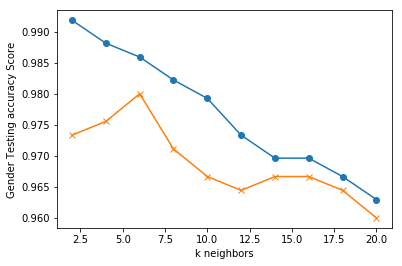

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(2, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
    knn.fit(X_train, g_train_enc)
    train_score = knn.score(X_train, g_train_enc)
    test_score = knn.score(X_test, g_test_enc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(2, 21, 2), train_scores, marker='o')
plt.plot(range(2, 21, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Gender Testing accuracy Score")
plt.show()

k: 3, Train/Test Score: 0.956/0.884
k: 6, Train/Test Score: 0.919/0.887
k: 9, Train/Test Score: 0.893/0.873
k: 12, Train/Test Score: 0.867/0.851
k: 15, Train/Test Score: 0.844/0.818
k: 18, Train/Test Score: 0.818/0.802
k: 21, Train/Test Score: 0.813/0.773
k: 24, Train/Test Score: 0.803/0.760
k: 27, Train/Test Score: 0.789/0.740
k: 30, Train/Test Score: 0.780/0.742


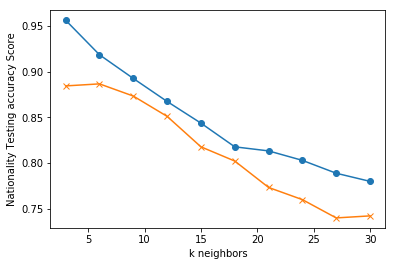

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(3, 31, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
    knn.fit(X_train, n_train_enc)
    train_score = knn.score(X_train, n_train_enc)
    test_score = knn.score(X_test, n_test_enc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(3, 31, 3), train_scores, marker='o')
plt.plot(range(3, 31, 3), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Nationality Testing accuracy Score")
plt.show()

k: 7, Train/Test Score: 0.861/0.782
k: 14, Train/Test Score: 0.779/0.693
k: 21, Train/Test Score: 0.710/0.647
k: 28, Train/Test Score: 0.672/0.596
k: 35, Train/Test Score: 0.640/0.584
k: 42, Train/Test Score: 0.606/0.562
k: 49, Train/Test Score: 0.587/0.531
k: 56, Train/Test Score: 0.568/0.513
k: 63, Train/Test Score: 0.562/0.498


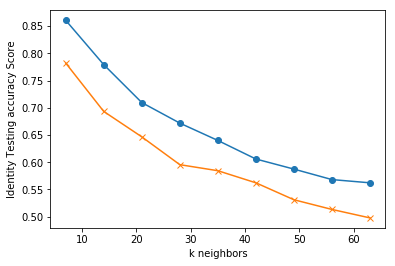

In [19]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(7, 70, 7):
    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
    knn.fit(X_train, i_train_enc)
    train_score = knn.score(X_train, i_train_enc)
    test_score = knn.score(X_test, i_test_enc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(7, 70, 7), train_scores, marker='o')
plt.plot(range(7, 70, 7), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Identity Testing accuracy Score")
plt.show()

In [24]:
# Note that k: 3 seems to be the best choice for this dataset, but 27 was chosen. Accuracy matched test.
knn = KNeighborsClassifier(n_neighbors=27)
#knn.fit(X_train, y_train)
#print('k=27 Test Acc: %.3f' % knn.score(X_test, y_test))
knn.fit(X_train, g_train_enc)
print('k=2 Test Acc: %.3f' % knn.score(X_test, g_test_enc))

k=2 Test Acc: 0.944


In [25]:
knn.fit(X_train, n_train_enc)
print('k=3 Test Acc: %.3f' % knn.score(X_test, n_test_enc))

k=3 Test Acc: 0.740


In [26]:
knn.fit(X_train, i_train_enc)
print('k=7 Test Acc: %.3f' % knn.score(X_test, i_test_enc))

k=7 Test Acc: 0.604


In [23]:
#calculate MSE
#predicted = knn.predict(X_test)
#mse = mean_squared_error(y_test, predicted)
#mse = mean_squared_error(g_test_enc, predicted)
#r2 = r2_score(y_test, predicted)
#r2 = r2_score((g_test_enc, predicted)
####print(f"Gender Mean squared Error (MSE) : {mse}")
####print(f"Gender R-squared (R2): {r2}")
#print(f"R2: {r2}")
#print(f"Gender Mean squared Error: {mse}")